Observações:
- ultimo video eh um highlight de highlights, tendo 3 horas de duração, por isso tem menos likes, comentarios e engajamento
- a taxa de engajamento é 1.97, considerada moderada, essa taxa de ~2% não é ruim. É compatível com o tipo de conteúdo (highlights) e o canal (grande, oficial). alguns motivos desse valor deve ser:
  - vídeos como “todos os highlights” tendem a ter muitas views mas menos comentários/curtidas por view, pois são longos, recapitulativos e o público assiste sem se envolver tanto.
  - A audiência da F1 no YouTube também pode estar vendo esses vídeos só pra rever o que já viu na corrida, então o engajamento tende a ser mais passivo.
- Os Graficos apresentam muitas subidas e descidas, isso provavelmente reflete o ritmo natural da temporada de F1


# Importando bibliotecas e tratando os dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_json("/content/f1_youtube_filtered.json")
df = df.drop(columns=['videoId', 'duration'])

In [ ]:
df["publishedAt"] = pd.to_datetime(df["publishedAt"])
df = df.sort_values(by="publishedAt")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 24 to 0
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   publishedAt   25 non-null     datetime64[ns, UTC]
 1   title         25 non-null     object             
 2   viewCount     25 non-null     int64              
 3   likeCount     25 non-null     int64              
 4   commentCount  25 non-null     int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(1)
memory usage: 1.2+ KB


In [ ]:
df

,publishedAt,title,viewCount,likeCount,commentCount
24,2024-03-02 17:20:52+00:00,Race Highlights | 2024 Bahrain Grand Prix,6653142,134235,8864
23,2024-03-09 18:58:37+00:00,Race Highlights | 2024 Saudi Arabian Grand Prix,6798065,124467,5153
22,2024-03-24 06:25:42+00:00,Race Highlights | 2024 Australian Grand Prix,10032333,210844,7054
21,2024-04-07 07:32:56+00:00,Race Highlights | 2024 Japanese Grand Prix,7496948,134480,4772
20,2024-04-21 09:54:18+00:00,Race Highlights | 2024 Chinese Grand Prix,6955957,119647,4639
19,2024-05-05 22:46:55+00:00,Race Highlights | 2024 Miami Grand Prix,7802003,183790,6470
18,2024-05-19 15:15:29+00:00,Race Highlights | 2024 Emilia Romagna Grand Prix,5762294,105000,3642
17,2024-05-26 16:21:02+00:00,Race Highlights | 2024 Monaco Grand Prix,9749810,177713,6866
16,2024-06-09 22:04:55+00:00,Race Highlights | 2024 Canadian Grand Prix,6723921,125442,4393
15,2024-06-23 15:22:49+00:00,Race Highlights | 2024 Spanish Grand Prix,5561713,107207,3555


# Realizando as análises e definindo os principais indicadores

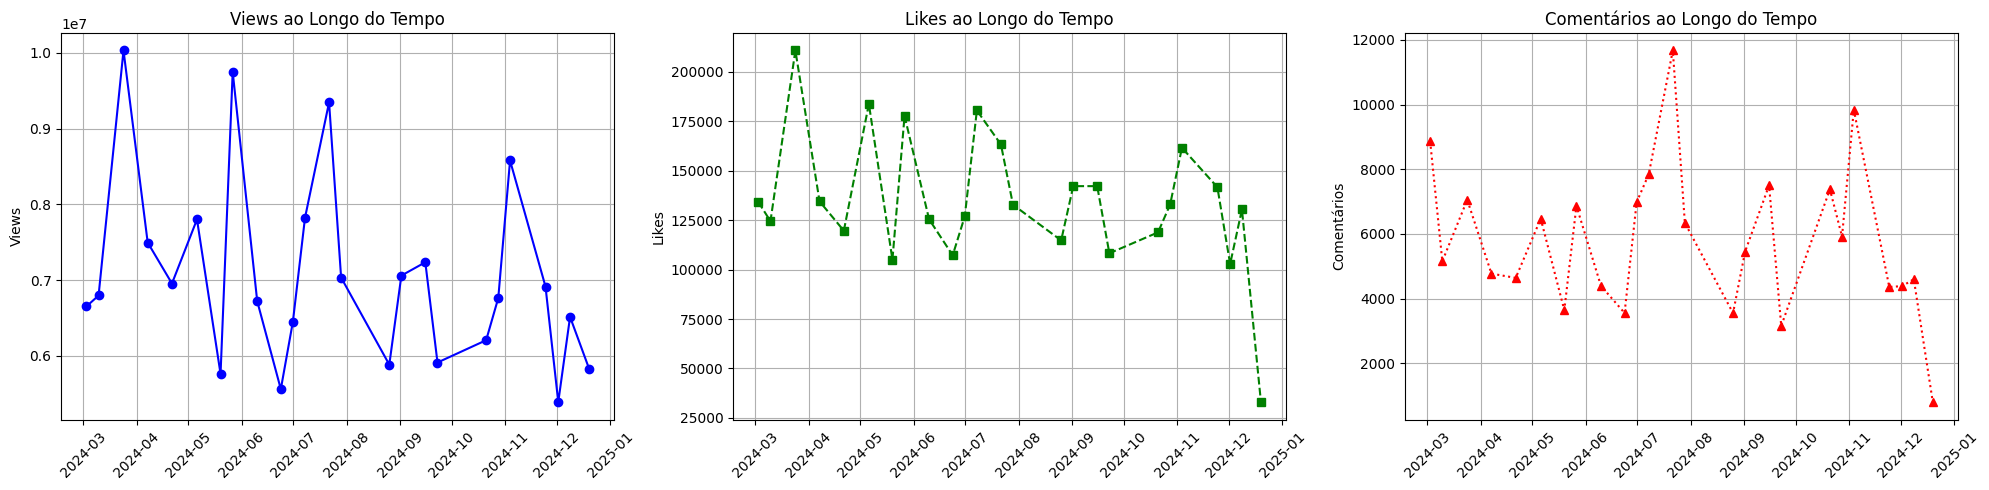

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

# Views
axes[0].plot(df["publishedAt"], df["viewCount"], marker="o", linestyle="-", color="blue")
axes[0].set_title("Views ao Longo do Tempo")
axes[0].set_ylabel("Views")
axes[0].grid(True)


# Likes
axes[1].plot(df["publishedAt"], df["likeCount"], marker="s", linestyle="--", color="green")
axes[1].set_title("Likes ao Longo do Tempo")
axes[1].set_ylabel("Likes")
axes[1].grid(True)
# Comments
axes[2].plot(df["publishedAt"], df["commentCount"], marker="^", linestyle=":", color="red")
axes[2].set_title("Comentários ao Longo do Tempo")
axes[2].set_ylabel("Comentários")
axes[2].grid(True)

for ax in axes:
  ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
#pegando os 5 videos mais vistos
df_ordenado_views = df.sort_values(by="viewCount", ascending=False).head(5)

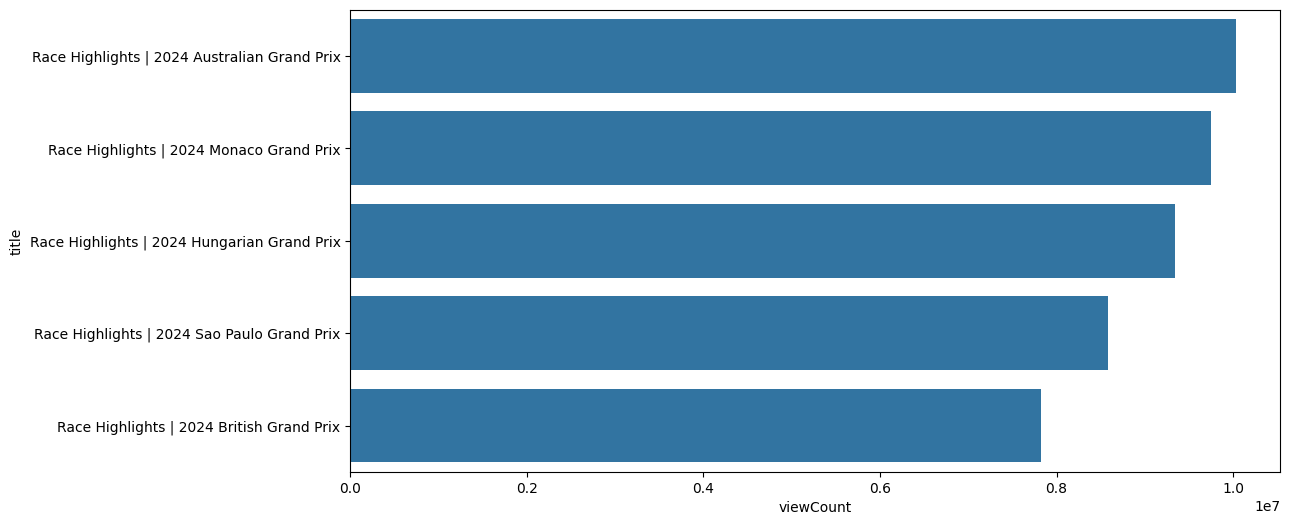

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_ordenado_views, x="viewCount", y='title');

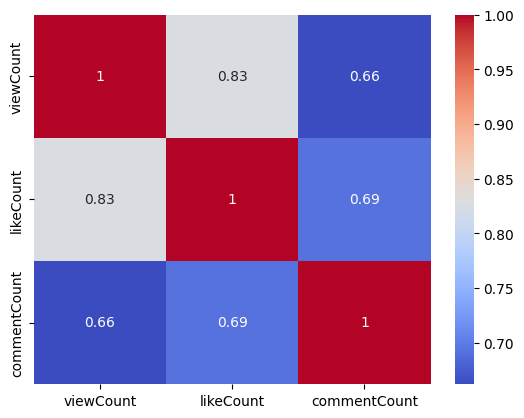

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm');

In [ ]:
df["engagementRate"] = ((df["likeCount"] + df["commentCount"]) / df["viewCount"]) * 100

print(f"média da taxa de engajamento: {df['engagementRate'].mean():.2f}%")

média da taxa de engajamento: 1.97%
